# Final Project - Kalkulator Pajak - Amerika (USD)

## Import Libraries

In [1]:
# Melakukan import libraries yang akan digunakan
import pandas as pd
import numpy as np
# Library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Library untuk korelasi
from scipy import stats
# Library untuk model ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
# Library untuk model LINREG
from sklearn.linear_model import LinearRegression
# Library untuk model LSTM
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import tensorflow as tf
import numpy as np
from tensorflow.keras.regularizers import L2
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.layers import Dense, LSTM, Dropout
# Library untuk model saving
import pickle
# Library untuk model inference
from datetime import datetime
# Library untuk evaluasi
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
# Library untuk handling warning
import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [2]:
# Melakukan loading data currency
df_usd = pd.read_csv('USD-2001.csv')
# Menampilkan hasil data
df_usd

,Date,Close
0,1/2/2001 23:58:00,9470.00
1,1/3/2001 23:58:00,9500.00
2,1/4/2001 23:58:00,9450.00
3,1/5/2001 23:58:00,9475.00
4,1/8/2001 23:58:00,9470.00
...,...,...
8066,4/30/2024 23:58:00,16262.85
8067,5/1/2024 23:58:00,16209.05
8068,5/2/2024 23:58:00,16104.00
8069,5/3/2024 23:58:00,15968.70


In [3]:
# Menampilkan 10 data awal tabel dengan head
df_usd.head(10)

,Date,Close
0,1/2/2001 23:58:00,9470.0
1,1/3/2001 23:58:00,9500.0
2,1/4/2001 23:58:00,9450.0
3,1/5/2001 23:58:00,9475.0
4,1/8/2001 23:58:00,9470.0
5,1/9/2001 23:58:00,9485.0
6,1/10/2001 23:58:00,9500.0
7,1/11/2001 23:58:00,9600.0
8,1/12/2001 23:58:00,9575.0
9,1/15/2001 23:58:00,9445.0


In [4]:
# Menampilkan 10 data akhir data menggunakan tail
df_usd.tail(10)

,Date,Close
8061,4/25/2024 23:58:00,16208.00
8062,4/26/2024 23:58:00,16241.30
8063,4/27/2024 23:58:00,16241.30
8064,4/28/2024 23:58:00,16210.00
8065,4/29/2024 23:58:00,16257.50
8066,4/30/2024 23:58:00,16262.85
8067,5/1/2024 23:58:00,16209.05
8068,5/2/2024 23:58:00,16104.00
8069,5/3/2024 23:58:00,15968.70
8070,5/4/2024 23:58:00,15968.70


## Exploratory Data Analysis

### Data Understanding

In [5]:
# Melihat kolom yang tersedia
df_usd.columns

Index(['Date', 'Close'], dtype='object')

In [6]:
# Melihat tipe data yang tersedia
df_usd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8071 entries, 0 to 8070
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    8071 non-null   object 
 1   Close   8071 non-null   float64
dtypes: float64(1), object(1)
memory usage: 126.2+ KB


In [7]:
# Melihat jumlah data yang tersedia
df_usd.shape

(8071, 2)

In [8]:
# Mengecek central tendency menggunakan describe
df_usd.describe()

,Close
count,8071.00000
mean,11521.81009
std,2457.28734
min,889.80000
25%,9173.45000
50%,10800.00000
75%,14022.44000
max,16622.20000


In [9]:
# Mengecek duplikasi pada data
df_usd.duplicated().value_counts()

False    8071
Name: count, dtype: int64

In [10]:
# Mengecek nilai null
df_usd.isnull().sum()

Date     0
Close    0
dtype: int64

### Data Visualization

Text(0, 0.5, 'Currency Price')

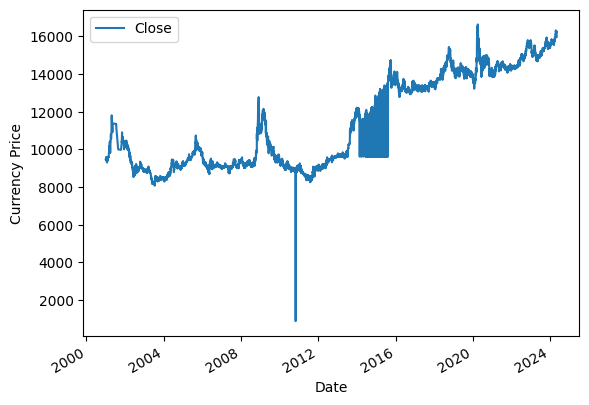

In [11]:
# Plot the data

df_usd.columns = ['Date', 'Close']
df_usd.Date = pd.to_datetime(df_usd.Date)
df_usd.set_index('Date',inplace=True)
df_usd.plot()
plt.xlabel('Date')
plt.ylabel('Currency Price')

## Feature Engineering


In [12]:
#splitting train and test
train=df_usd[:6000]
test=df_usd[6000:]

## Model Definition & Training

### Moving Average

In [13]:
# Membuat hasil prediksi dengan rolling window 12 hari
predictions = []

window_size = 12
for i in range(len(test)):
    if i < window_size:
        moving_avg = train['Close'].mean()
    else:
        moving_avg = train['Close'].iloc[-window_size:].mean()

    predictions.append(moving_avg)

    train = pd.concat([train, test.iloc[[i]]], ignore_index=True)

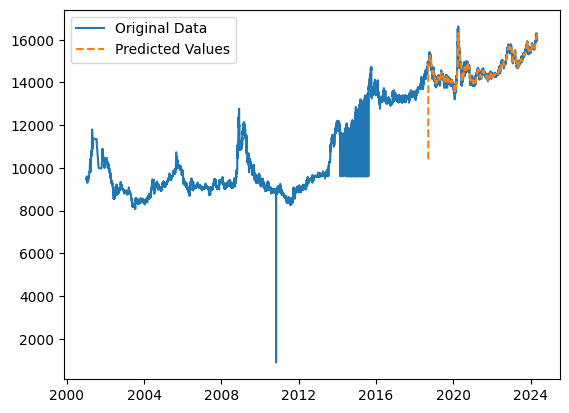

In [14]:
# Melakukan visualisasi plot data
plt.plot(df_usd['Close'], label='Original Data')
plt.plot(test.index, predictions, label='Predicted Values', linestyle='--')
plt.legend()
plt.show()

In [15]:
# Melihat hasil prediksi
print(predictions)

[10426.199917166668, 10426.934094817532, 10427.684355714762, 10428.44267916042, 10429.18627631579, 10429.943197835137, 10430.672977522478, 10431.402514233394, 10432.137051098534, 10432.870095356964, 10433.597903993345, 10434.314324238894, 14855.408333333333, 14852.666666666666, 14842.416666666666, 14836.35, 14834.183333333334, 14826.308333333334, 14827.891666666668, 14831.391666666668, 14828.683333333334, 14826.6, 14831.1, 14854.558333333334, 14869.891666666668, 14879.866666666667, 14886.783333333333, 14884.824999999999, 14887.741666666667, 14902.183333333332, 14919.349999999999, 14943.033333333333, 14992.775, 15017.400000000001, 15023.349999999999, 15035.974999999999, 15070.558333333332, 15095.908333333333, 15121.408333333333, 15156.041666666666, 15179.5, 15189.441666666668, 15202.775000000001, 15207.324999999999, 15189.333333333334, 15202.4, 15235.408333333333, 15235.283333333331, 15214.4, 15210.9, 15216.625, 15206.941666666668, 15214.108333333332, 15221.166666666666, 15220.550000000

In [16]:
# Melakukan evaluasi
print("MAE :", mean_absolute_error(test.Close, predictions))
print("RMSE :", sqrt(mean_squared_error(test.Close, predictions)))

MAE : 117.90460789274715
RMSE : 365.5399527084456


### ARIMA

#### Checking Stationary

In [17]:
# Create a function to check stationarity

def check_stationarity(series):
    # Copied from https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [18]:
# Check stationarity of the dataset

check_stationarity(df_usd['Close'])

ADF Statistic: -0.560670
p-value: 0.879624
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Non-stationary


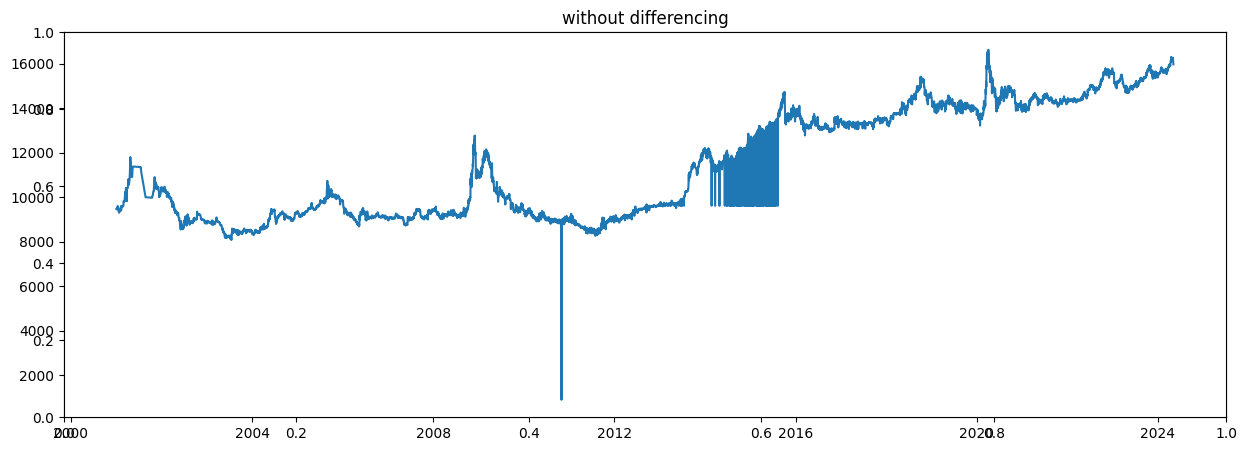

In [19]:
# Plot without differencing

fig, ax = plt.subplots(figsize=(15,5))
ax1 = fig.add_subplot(111)
ax1.set_title('without differencing')
ax1.plot(df_usd['Close'])

In [20]:
# Check stationarity after performing first-order differencing

print("1st order differencing")
check_stationarity(df_usd['Close'].diff().dropna())

1st order differencing
ADF Statistic: -14.677072
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Stationary


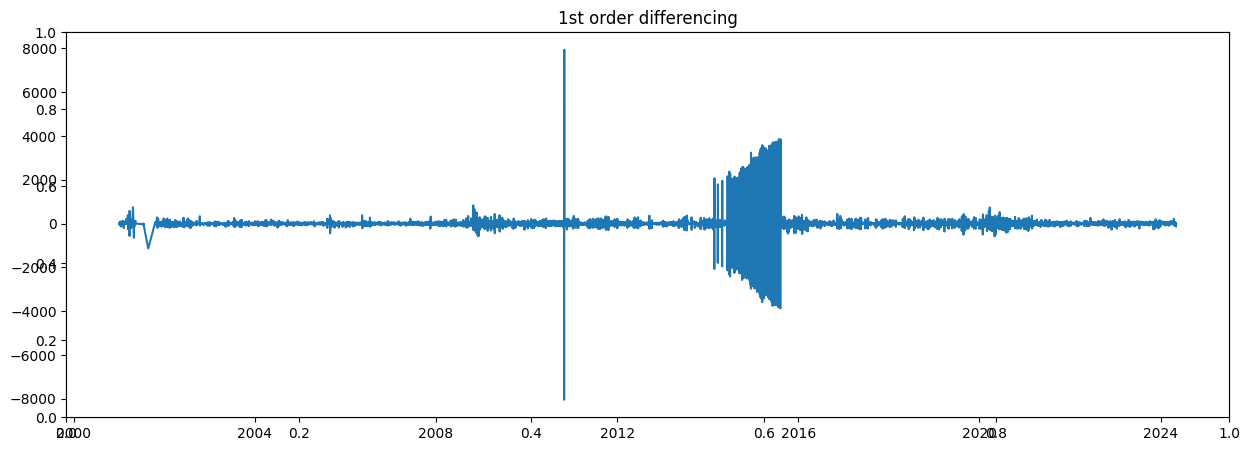

In [21]:
# Plot the result after first-order differencing

fig, ax = plt.subplots(figsize=(15,5))
ax1 = fig.add_subplot(111)
ax1.set_title('1st order differencing')
ax1.plot(df_usd['Close'].diff())

#### ACF & PACF

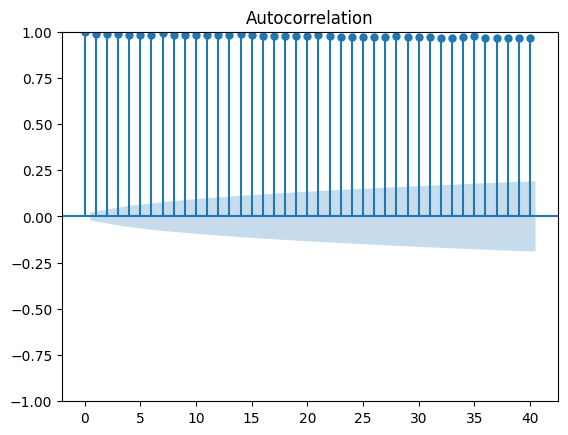

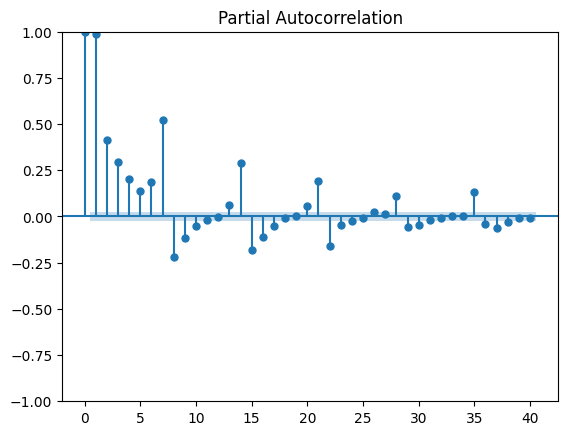

In [22]:
# Plot ACF & PACF from the original dataset

plot_acf(df_usd['Close'])
plot_pacf(df_usd['Close'])
plt.show()

Karena ini merupakan plot pada data yang belum dilakukan differencing, maka lihat juga untuk plot yang sudah dilakukan differencing sampai stasioner.

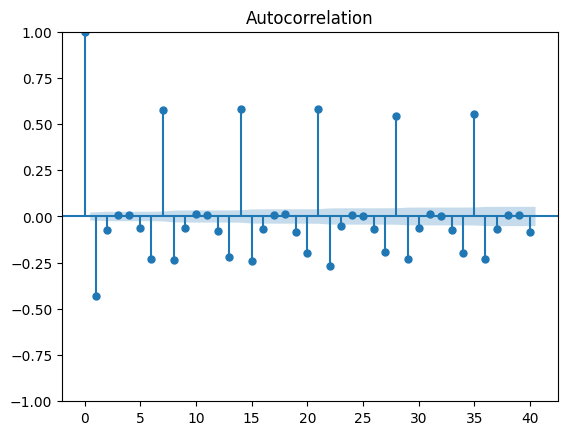

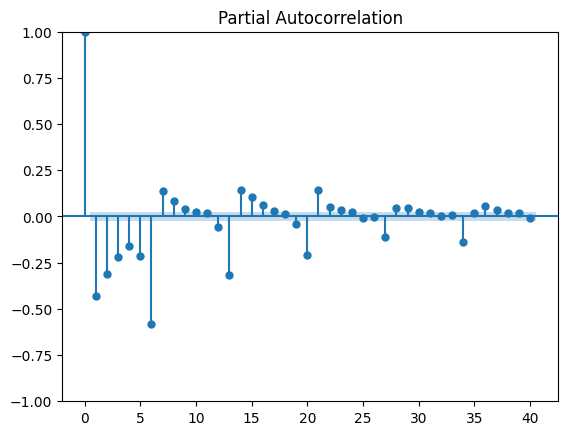

In [23]:
# Plot ACF & PACF for differencing the original dataset

plot_acf(df_usd['Close'].diff().dropna())
plot_pacf(df_usd['Close'].diff().dropna())
plt.show()

Dari hasil plot, dapat terlihat bahwa rekomendasi untuk pembuatan model ARIMA adalah sebagai berikut.
- p (Partial Autocorrelation) = 1,2,6,13 (batas lag 0.25 & -0.25)
- d = 1 (dikarenakan data stasioner pada diferensiasi 1)
- q (Autocorrelation) = 1,7,14,21,22,28,35 (batas lag 0.25 & -0.25)

Dari beberapa pilihan tersebut, kita akan lakukan pencarian model ARIMA terbaik.

#### ARIMA Model

In [24]:
# # Create a function to find best model

# def find_best_model(data, num_p, num_d, num_q):
#   df = pd.DataFrame() #We make a pandas dataframe to ease our work, you can use any way that makes you comfortable and work easly
#   pdq = [[],[],[]] #This list for storing the combinations of p and q
#   aic = [] # This list for storing aic value
#   for p in range(num_p + 1): #plus one is to make the range up to num_p since python range only ranging from 0 to N-1
#     for d in range(num_d + 1):
#       for q in range(num_q + 1):
#         # #if p!=0 and q!=0: #this logic will avoid (0,0) value which is not correct
#         try: #Using exception to avoid the error while training the model with certain p and q value
#           model = ARIMA(data, order=(p, d, q))
#           result = model.fit()
#           pdq[0].append(p)
#           pdq[1].append(d)
#           pdq[2].append(q)
#           aic.append(result.aic)
#         except:
#           pass #If there is an error caused by the calculation, it will be skipped to the next iteration

#   df['p'] = pdq[0]
#   df['d'] = pdq[1]
#   df['q'] = pdq[2]
#   df['AIC'] = aic

#   df.sort_values('AIC', inplace=True)

#   return df.p.iloc[0], df.d.iloc[0], df.q.iloc[0], df.AIC.iloc[0], df

In [25]:
# # Find best model of ARIMA with combinations of p=6, d=1, q=7

# %%time
# find_best_model(df_usd['Close'], 6, 1, 7)

In [26]:
# Train ARIMA with best combinations (last lag)

model_arima_13135 = ARIMA(df_usd['Close'], order=(13, 1, 35))
result_model_arima_13135 = model_arima_13135.fit()

print('The AIC is ', result_model_arima_13135.aic)

The AIC is  109972.91922632947


In [27]:
# Prediksi model pada data
new_pred1 = result_model_arima_13135.predict(start="2001-01-02", end="2024-05-04")
new_pred1 = pd.DataFrame(new_pred1)
new_pred1.columns = ['Close_predict']

all_dataset_with_pred1 = pd.concat([df_usd, new_pred1], axis=1)
all_dataset_with_pred1

,Close,Close_predict
Date,,
2001-01-02 23:58:00,9470.00,0.000000
2001-01-03 23:58:00,9500.00,8905.825254
2001-01-04 23:58:00,9450.00,9185.999707
2001-01-05 23:58:00,9475.00,9266.775594
2001-01-08 23:58:00,9470.00,9312.101535
...,...,...
2024-04-30 23:58:00,16262.85,16256.103962
2024-05-01 23:58:00,16209.05,16274.111528
2024-05-02 23:58:00,16104.00,16236.367377


In [28]:
# Melakukan forecasting pada data
len_dataset = df_usd.shape[0]
len_predict = len_dataset + 12


new_pred = result_model_arima_13135.predict(len_dataset, len_predict)
new_pred = pd.DataFrame(new_pred)
new_pred.columns = ['Close_forecast']

last_date = df_usd.index.max()
date_range = pd.date_range(start=last_date, periods=13)
new_pred.index = date_range

# Menggabungkan prediksi dengan dataset asli
all_dataset_with_pred = pd.concat([all_dataset_with_pred1, new_pred], axis=1)
all_dataset_with_pred

,Close,Close_predict,Close_forecast
2001-01-02 23:58:00,9470.0,0.000000,NaN
2001-01-03 23:58:00,9500.0,8905.825254,NaN
2001-01-04 23:58:00,9450.0,9185.999707,NaN
2001-01-05 23:58:00,9475.0,9266.775594,NaN
2001-01-08 23:58:00,9470.0,9312.101535,NaN
...,...,...,...
2024-05-12 23:58:00,NaN,NaN,16112.087117
2024-05-13 23:58:00,NaN,NaN,16112.981711
2024-05-14 23:58:00,NaN,NaN,16125.088365
2024-05-15 23:58:00,NaN,NaN,16092.570506


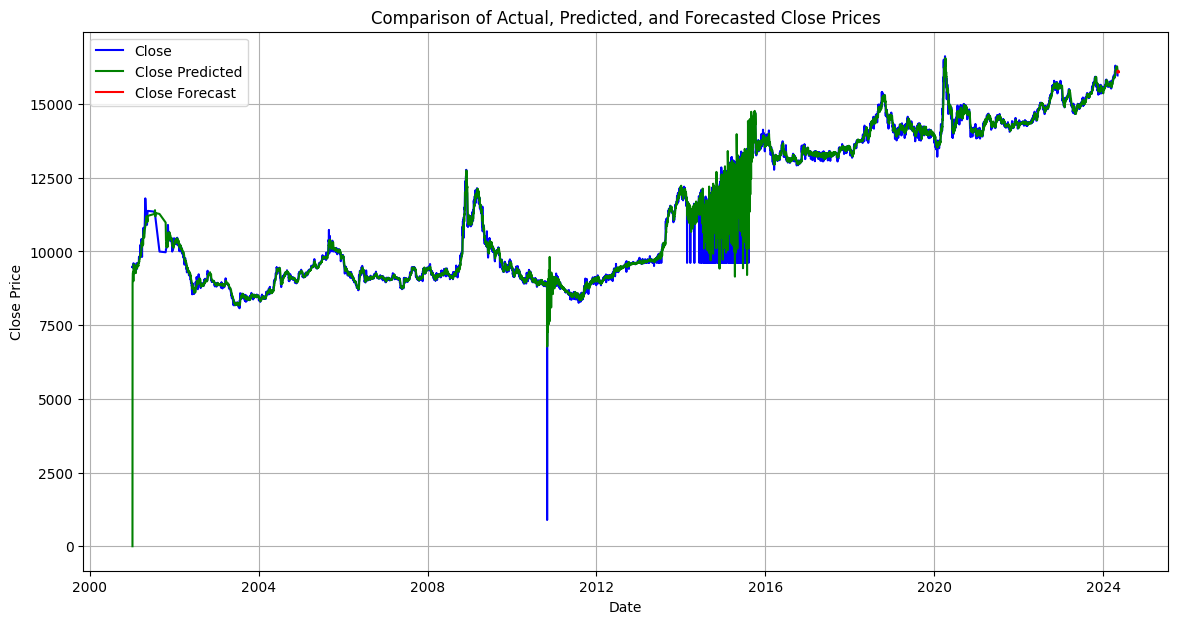

In [29]:
# Melakukan visualisasi data
plt.figure(figsize=(14, 7))
plt.plot(all_dataset_with_pred.index, all_dataset_with_pred['Close'], label='Close', color='blue', linestyle='-')  # Data asli
plt.plot(all_dataset_with_pred.index, all_dataset_with_pred['Close_predict'], label='Close Predicted', color='green', linestyle='-')  # Data prediksi
plt.plot(all_dataset_with_pred.index, all_dataset_with_pred['Close_forecast'], label='Close Forecast', color='red', linestyle='-')  # Data forecast

plt.title('Comparison of Actual, Predicted, and Forecasted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
valid_data = all_dataset_with_pred.dropna(subset=['Close', 'Close_predict'])
valid_data

,Close,Close_predict,Close_forecast
2001-01-02 23:58:00,9470.00,0.000000,NaN
2001-01-03 23:58:00,9500.00,8905.825254,NaN
2001-01-04 23:58:00,9450.00,9185.999707,NaN
2001-01-05 23:58:00,9475.00,9266.775594,NaN
2001-01-08 23:58:00,9470.00,9312.101535,NaN
...,...,...,...
2024-04-30 23:58:00,16262.85,16256.103962,NaN
2024-05-01 23:58:00,16209.05,16274.111528,NaN
2024-05-02 23:58:00,16104.00,16236.367377,NaN
2024-05-03 23:58:00,15968.70,16211.915055,NaN


In [31]:
print('MAE : ', mean_absolute_error(valid_data['Close'], valid_data['Close_predict']))
print('RMSE : ', np.sqrt(mean_squared_error(valid_data['Close'], valid_data['Close_predict'])))

MAE :  88.72456021176579
RMSE :  242.97229602764432


### Regression

#### Creating Dataset
Data akan menggunakan lag untuk menjadi fitur. Lag yang digunakan rekomendasi berada pada kisaran 3-6 lag.

In [32]:
df_usd.head(10)

,Close
Date,
2001-01-02 23:58:00,9470.0
2001-01-03 23:58:00,9500.0
2001-01-04 23:58:00,9450.0
2001-01-05 23:58:00,9475.0
2001-01-08 23:58:00,9470.0
2001-01-09 23:58:00,9485.0
2001-01-10 23:58:00,9500.0
2001-01-11 23:58:00,9600.0
2001-01-12 23:58:00,9575.0


In [33]:
# Membuat dataset menggunakan lag
df_reg = df_usd.copy()
df_reg = df_reg.drop(['Close'], axis=1)
df_reg['lag_5'] = df_usd['Close'].shift(5)
df_reg['lag_4'] = df_usd['Close'].shift(4)
df_reg['lag_3'] = df_usd['Close'].shift(3)
df_reg['lag_2'] = df_usd['Close'].shift(2)
df_reg['lag_1'] = df_usd['Close'].shift(1)
df_reg['y'] = df_usd['Close']

# Menampilkan dataset
df_reg

,lag_5,lag_4,lag_3,lag_2,lag_1,y
Date,,,,,,
2001-01-02 23:58:00,NaN,NaN,NaN,NaN,NaN,9470.00
2001-01-03 23:58:00,NaN,NaN,NaN,NaN,9470.00,9500.00
2001-01-04 23:58:00,NaN,NaN,NaN,9470.00,9500.00,9450.00
2001-01-05 23:58:00,NaN,NaN,9470.00,9500.00,9450.00,9475.00
2001-01-08 23:58:00,NaN,9470.00,9500.00,9450.00,9475.00,9470.00
...,...,...,...,...,...,...
2024-04-30 23:58:00,16208.0,16241.30,16241.30,16210.00,16257.50,16262.85
2024-05-01 23:58:00,16241.3,16241.30,16210.00,16257.50,16262.85,16209.05
2024-05-02 23:58:00,16241.3,16210.00,16257.50,16262.85,16209.05,16104.00


#### Cleaning Data

In [34]:
# Melakukan pengecekan nilai null pada dataset
df_reg.isnull().sum()

lag_5    5
lag_4    4
lag_3    3
lag_2    2
lag_1    1
y        0
dtype: int64

In [35]:
# Melakukan dropping nilai null pada data
df_reg.dropna(inplace=True)

# Mengecek hasil dropping nilai null
df_reg.isnull().sum()

lag_5    0
lag_4    0
lag_3    0
lag_2    0
lag_1    0
y        0
dtype: int64

#### Visualizations

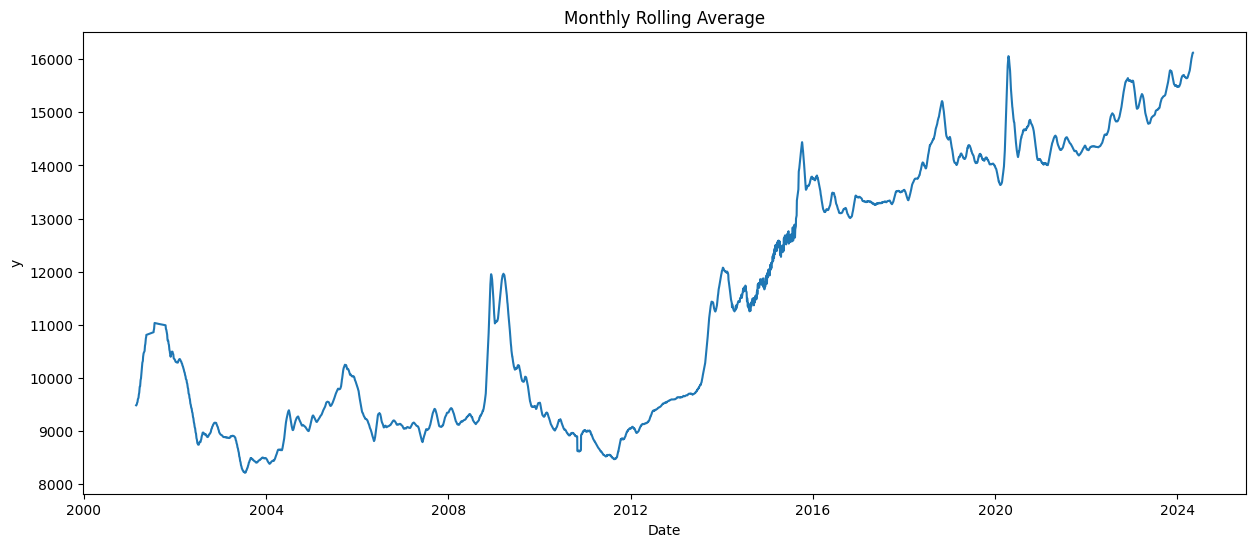

In [36]:
# Membuat visualisasi rolling per bulan
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x = df_reg.index, y = df_reg["y"].rolling(30).mean(), data = df_reg, ax=ax)
ax.set_title("Monthly Rolling Average");

In [37]:
# Mengecek korelasi
df_reg.corr()

,lag_5,lag_4,lag_3,lag_2,lag_1,y
lag_5,1.000000,0.987590,0.985798,0.985768,0.985508,0.985049
lag_4,0.987590,1.000000,0.987595,0.985803,0.985772,0.985512
lag_3,0.985798,0.987595,1.000000,0.987599,0.985807,0.985776
lag_2,0.985768,0.985803,0.987599,1.000000,0.987603,0.985812
lag_1,0.985508,0.985772,0.985807,0.987603,1.000000,0.987607
y,0.985049,0.985512,0.985776,0.985812,0.987607,1.000000


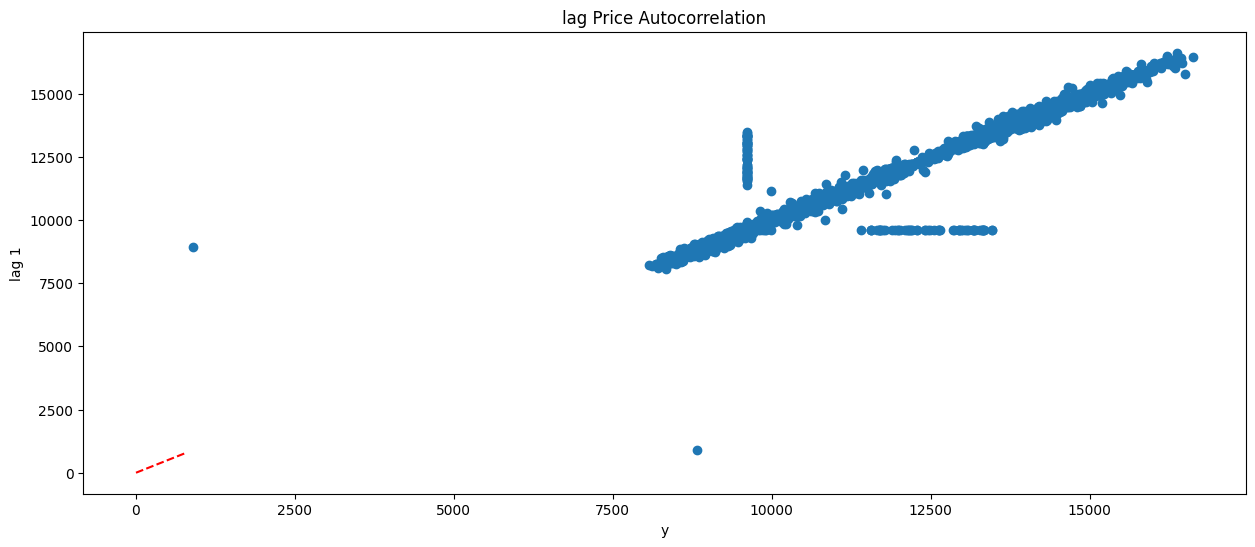

In [38]:
# Membuat visualisasi korelasi antara lag 0 dan lag 1
fig, ax = plt.subplots(figsize=(15, 6))
ax.scatter(x=df_reg["y"], y=df_reg["lag_1"])
ax.plot([0,800],[0,800],linestyle="--", color="red")
plt.xlabel("y")
plt.ylabel("lag 1")
plt.title("lag Price Autocorrelation");

#### Feature Engineering

In [39]:
# Split the data menjadi fitur dan target
target = "y"
y = df_reg[target]
X = df_reg.drop(columns= target)

#Split the data into train and test sets
cutoff = int(len(X) * 0.8)
X_train, y_train = X.iloc[:cutoff], y.iloc[:cutoff]
X_test, y_test = X.iloc[cutoff:], y.iloc[cutoff:]

<Axes: xlabel='Date'>

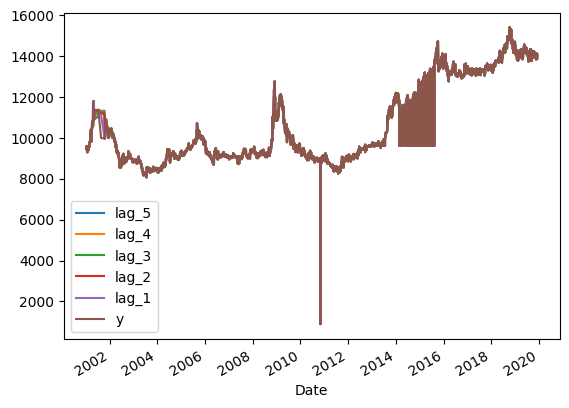

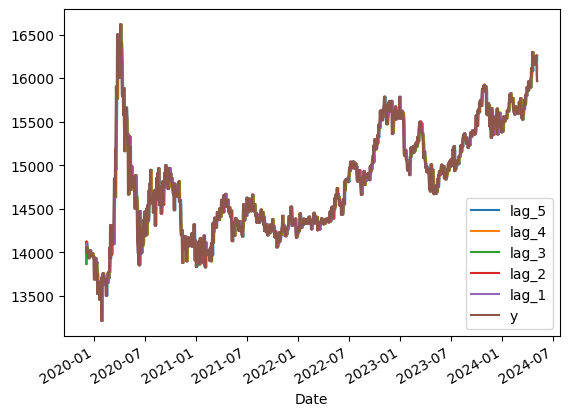

In [40]:
# Plotting data
df_reg[:len(X_train)].plot()
df_reg[len(X_train):].plot()

#### Model training

In [41]:
# Menentukan baseline MAE (persebaran nilai data)
y_pred_baseline = [y_train.mean()] * len(y_train)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
print("Mean Close Prices:", round(y_train.mean(), 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean Close Prices: 10702.85
Baseline MAE: 1819.37


In [42]:
# Melakukan modeling
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [43]:
# Melihat hasil nilai MAE training dan test
training_mae = mean_absolute_error(y_train, model.predict(X_train))
test_mae = mean_absolute_error(y_test, model.predict(X_test))
print("Training MAE:", round(training_mae, 2))
print("Test MAE:", round(test_mae, 2))

Training MAE: 115.16
Test MAE: 69.07


In [44]:
# Membuat dataset perbandingan y_test dan y_pred
df_pred_test = pd.DataFrame(
             {
             "y_test": y_test,
             "y_pred": model.predict(X_test)
             }
)
df_pred_test.head()

,y_test,y_pred
Date,,
2019-12-04 23:58:00,13994.88,14038.284611
2019-12-05 23:58:00,14058.00,14012.211923
2019-12-06 23:58:00,14019.38,14019.215590
2019-12-07 23:58:00,14019.38,14035.108340
2019-12-08 23:58:00,14022.38,14019.463384


In [45]:
# Melakukan visualisasi data prediksi dengan data asli
fig = px.line(df_pred_test, labels= {"value": "Close Price"}, title = "Linear Regression Model: Actual Prices vs. Predicted Prices.")
fig.show()

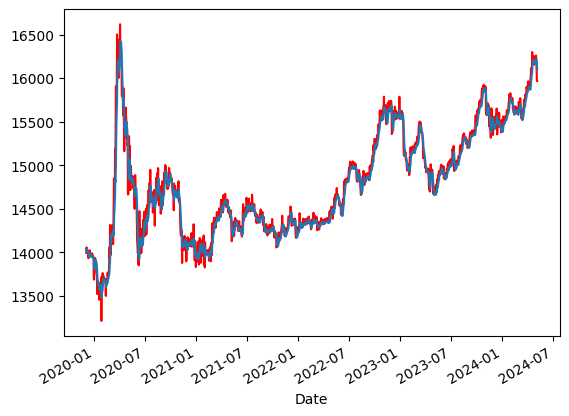

In [46]:
df_pred_test['y_test'].plot(color='red')
plt.plot(df_pred_test['y_pred'])

In [47]:
# Check the MAE & RMSE
print('MAE test  : ', mean_absolute_error(df_pred_test['y_test'], df_pred_test['y_pred']))
print('RMSE test : ', np.sqrt(mean_squared_error(df_pred_test['y_test'], df_pred_test['y_pred'])))

MAE test  :  69.07436779103384
RMSE test :  103.244793636829


### LSTM

In [48]:
tf.random.set_seed(100)
tf.keras.backend.clear_session()

# Define the model_usd
model_usd = Sequential([
    LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1],1), kernel_regularizer=L2(0.001)),
    Dropout(0.2),
    LSTM(units=128, return_sequences=True, kernel_regularizer=L2(0.001)),
    Dropout(0.2),
    LSTM(units=128, kernel_regularizer=L2(0.001)),
    Dropout(0.2),
    Dense(units=64, activation='relu', kernel_regularizer=L2(0.001)),
    Dropout(0.2),
    Dense(units=1, kernel_regularizer=L2(0.001))
])

model_usd.compile(optimizer='adam', loss='mae', metrics=['mae'])

# Display model_usd summary
model_usd.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 128)            66560     
                                                                 
 dropout (Dropout)           (None, 5, 128)            0         
                                                                 
 lstm_1 (LSTM)               (None, 5, 128)            131584    
                                                                 
 dropout_1 (Dropout)         (None, 5, 128)            0         
                                                                 
 lstm_2 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8

In [49]:
history_thb = model_usd.fit(X_train, y_train, epochs= 100, batch_size= 32)

Epoch 1/100
202/202 [==============================] - 14s 34ms/step - loss: 10499.2178 - mae: 10498.7627
Epoch 2/100
202/202 [==============================] - 7s 33ms/step - loss: 9425.2910 - mae: 9424.1201
Epoch 3/100
202/202 [==============================] - 7s 36ms/step - loss: 7308.9531 - mae: 7306.0366
Epoch 4/100
202/202 [==============================] - 6s 31ms/step - loss: 4230.1611 - mae: 4224.5527
Epoch 5/100
202/202 [==============================] - 8s 39ms/step - loss: 1979.4282 - mae: 1971.3447
Epoch 6/100
202/202 [==============================] - 6s 29ms/step - loss: 1858.2568 - mae: 1849.6598
Epoch 7/100
202/202 [==============================] - 8s 40ms/step - loss: 1820.8126 - mae: 1812.1276
Epoch 8/100
202/202 [==============================] - 6s 30ms/step - loss: 1834.0801 - mae: 1825.4481
Epoch 9/100
202/202 [==============================] - 8s 38ms/step - loss: 1842.2941 - mae: 1833.6753
Epoch 10/100
202/202 [==============================] - 6s 29ms/step -

In [50]:
predictions_lstm = model_usd.predict(X_test)

51/51 [==============================] - 2s 9ms/step


In [51]:
print('MAE : ', mean_absolute_error(y_test, predictions_lstm))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, predictions_lstm)))

MAE :  4779.809808414653
RMSE :  4819.018311280908


## Model Evaluation

### Finding Best Model

In [52]:
# Membuat dictionary untuk menyimpan hasil mae dan rmse dari data

all_reports = {}
def performance_report(all_reports, y_test, y_pred_test, name):
  score_reports = {
      'MAE test' : mean_absolute_error(y_test, y_pred_test),
      'RMSE test' : np.sqrt(mean_squared_error(y_test, y_pred_test)),
  }
  all_reports[name] = score_reports
  return all_reports

In [53]:
# Menambahkan hasil Linear Regression ke dalam dictionary
all_reports = performance_report(all_reports, df_pred_test['y_test'], df_pred_test['y_pred'], 'Linear Regression')
pd.DataFrame(all_reports)

,Linear Regression
MAE test,69.074368
RMSE test,103.244794


In [54]:
# Menambahkan hasil Moving Average ke dalam dictionary
all_reports = performance_report(all_reports, test.Close, predictions, 'Moving Average')
pd.DataFrame(all_reports)

,Linear Regression,Moving Average
MAE test,69.074368,117.904608
RMSE test,103.244794,365.539953


In [55]:
# Menambahkan hasil ARIMA ke dalam dictionary
all_reports = performance_report(all_reports, valid_data['Close'], valid_data['Close_predict'], 'ARIMA')
pd.DataFrame(all_reports)

,Linear Regression,Moving Average,ARIMA
MAE test,69.074368,117.904608,88.724560
RMSE test,103.244794,365.539953,242.972296


In [56]:
# Menambahkan hasil LSTM ke dalam dictionary
all_reports = performance_report(all_reports, y_test, predictions_lstm, 'LSTM')
pd.DataFrame(all_reports)

,Linear Regression,Moving Average,ARIMA,LSTM
MAE test,69.074368,117.904608,88.724560,4779.809808
RMSE test,103.244794,365.539953,242.972296,4819.018311


Dari hasil perbandingan nilai MAE dan RMSE, didapatkan model linear regression memiliki hasil terbaik. Hasil linear regression akan dilakukan analisis lanjutan.

### Further Analysis
Dilakukan perbandingan min dan max dari test set dengan hasil prediksi.

In [57]:
# Melihat data hasil
hasil = df_pred_test.copy()
hasil.head()

,y_test,y_pred
Date,,
2019-12-04 23:58:00,13994.88,14038.284611
2019-12-05 23:58:00,14058.00,14012.211923
2019-12-06 23:58:00,14019.38,14019.215590
2019-12-07 23:58:00,14019.38,14035.108340
2019-12-08 23:58:00,14022.38,14019.463384


In [58]:
# Melihat min dan max dari data menggunakan describe
hasil.describe()

,y_test,y_pred
count,1614.000000,1614.000000
mean,14801.975824,14778.740380
std,613.668482,604.899106
min,13213.240000,13482.715138
25%,14329.950000,14315.098363
50%,14705.000000,14686.687530
75%,15317.687500,15281.440675
max,16622.200000,16424.014180


Dari hasil didapatkan stat sebagai berikut.

| Stat | Prediksi | Nilai asli
| --- | --- | --- |
| Min | 13482.72 | 13213.24 |
| Max | 16424.01 | 16622.2 |
| Median | 14686.69 | 14705 |
| Mean | 14778.74 | 14801.98 |

Dapat terlihat bahwa terdapat beberapa insight : <br>
1. Hasil prediksi memiliki median dan mean yang cenderung relatif mirip dengan nilai asli.
2. Nilai prediksi memiliki batas minimum yang lebih tinggi namun memiliki nilai max yang lebih rendah dari nilai asli.

Untuk melihat jumlah data yang termasuk ke dalam kategori dapat dilakukan analisis lebih lanjut.

In [59]:
# Melakukan perhitungan jumlah data dimana y_pred < y_test
jum_lower_data = hasil[(hasil['y_pred']<hasil['y_test'])].count()
print(f"Jumlah data nilai prediksi lebih kecil dari data asli adalah {jum_lower_data[0]}")
print("Keseluruhan jumlah data adalah ", len(hasil))
print("Persentase jumlah data lebih kecil adalah ", (jum_lower_data[0]/len(hasil))*100, "%")

Jumlah data nilai prediksi lebih kecil dari data asli adalah 1061
Keseluruhan jumlah data adalah  1614
Persentase jumlah data lebih kecil adalah  65.7372986369269 %


Jika dilihat melalui analisis lebih lanjut, terlihat bahwa data y_pred (prediksi) yang lebih kecil dari y_test (aktual) sebanyak 65.7%. Hal ini mengindikasikan bahwa 34.3% sisanya memprediksikan hasil yang lebih tinggi. Oleh karena itu, dapat terlihat bahwa **model memprediksikan data dengan kecenderungan lebih rendah dari y_test (data asli / aktual)**.

In [60]:
# Melakukan pengecekan terkait asumsi prediksi > y_test
jum_higher_data = hasil[(hasil['y_pred']>hasil['y_test'])].count()
print(f"Jumlah data prediksi lebih besar dari data asli adalah {jum_higher_data[0]}")
print("Keseluruhan jumlah data adalah ", len(hasil))
print("Persentase jumlah data lebih kecil adalah ", (jum_higher_data[0]/len(hasil))*100, "%")

Jumlah data prediksi lebih besar dari data asli adalah 553
Keseluruhan jumlah data adalah  1614
Persentase jumlah data lebih kecil adalah  34.26270136307311 %


Dari hasil eksplorasi didapatkan bahwa asumsi tersebut terbukti benar.

## Model Saving

In [61]:
# Melakukan penyimpanan model regreasi linear sebagai pickle file
model_pkl_file = "bea_cukai_usd_linreg.pkl"

with open(model_pkl_file, 'wb') as file:
    pickle.dump(model, file)

## Model Inference

In [62]:
def forecasting(day):
  kurs_forecast = df_usd.copy()
  window=5
  for i in range(day):
    temp_X = pd.DataFrame(kurs_forecast[-window:].values.reshape(1,-1))
    new_idx = datetime(kurs_forecast.index.year[-1],kurs_forecast.index.month[-1],kurs_forecast.index.day[-1]+1)
    # Forecast
    kurs_forecast.loc[new_idx] = model.predict(temp_X)
  return kurs_forecast

In [63]:
# Forecast data for the next 2 weeks
forecasting(14)

,Close
Date,
2001-01-02 23:58:00,9470.000000
2001-01-03 23:58:00,9500.000000
2001-01-04 23:58:00,9450.000000
2001-01-05 23:58:00,9475.000000
2001-01-08 23:58:00,9470.000000
...,...
2024-05-14 00:00:00,15931.663020
2024-05-15 00:00:00,15922.842214
2024-05-16 00:00:00,15912.464433


In [64]:
kurs_forecast = df_usd.copy()

<Axes: xlabel='Date'>

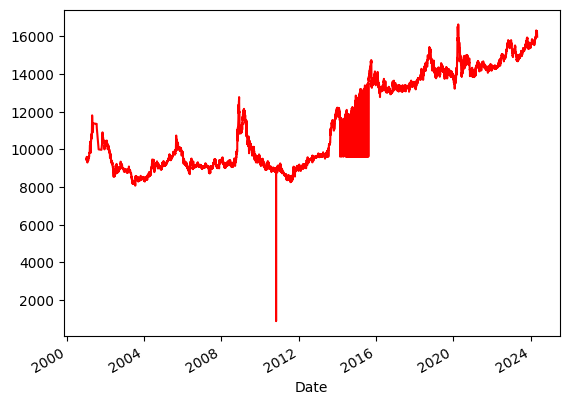

In [65]:
kurs_forecast['Close'].plot(color='red')